# Word Embeddings

## TF-IDF Vectorizer

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
import warnings

In [2]:
# Load preprocessed data
df = pd.read_json('../../data/preprocessed/translated_results_en 2.json')
df.head()

,name,original_idx,website_url,website_text,original_language,website_text_in_en
0,itravel,0,https://www.itravel.de/,itravel Telefonische Beratung +49 221 8282 888...,de,itravel Telephone advice +49 221 8282 8880 | S...
1,kunveno,2,https://kunveno.de,Kunveno - Work Happier WORK HAPPIER Booste Unt...,de,Kunveno - Work Happier WORK HAPPIER Boost cult...
3,Scopas,4,https://www.scopas.io/,ScopasWe're working on something new.Check it ...,en,ScopasWe're working on something new.Check it ...
4,studymaniac,5,https://studymaniac.de,Studymaniac - erfolgreich Studieren Open main ...,de,Studymaniac - study successfully Open main men...
6,Aicone,9,http://www.ai-c.one,Aicone - Artificial Intelligence Cloud One | A...,en,Aicone - Artificial Intelligence Cloud One | A...


In [3]:
import sys
sys.path.insert(0, '../../src/02 Data Preprocessing')
from Preprocessing_en import preprocess_data

In [4]:
preprocess_data(df['website_text_in_en'])
df.head()

,name,original_idx,website_url,website_text,original_language,website_text_in_en
0,itravel,0,https://www.itravel.de/,itravel Telefonische Beratung +49 221 8282 888...,de,itravel Telephone advice +49 221 8282 8880 | S...
1,kunveno,2,https://kunveno.de,Kunveno - Work Happier WORK HAPPIER Booste Unt...,de,Kunveno - Work Happier WORK HAPPIER Boost cult...
3,Scopas,4,https://www.scopas.io/,ScopasWe're working on something new.Check it ...,en,ScopasWe're working on something new.Check it ...
4,studymaniac,5,https://studymaniac.de,Studymaniac - erfolgreich Studieren Open main ...,de,Studymaniac - study successfully Open main men...
6,Aicone,9,http://www.ai-c.one,Aicone - Artificial Intelligence Cloud One | A...,en,Aicone - Artificial Intelligence Cloud One | A...


In [5]:
# Initialize TF-IDF Vectorizer from sklearn
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2',
                             max_features=1000, max_df=0.5, min_df=2, stop_words='english')

# Apply vectorizer
tf_idf_matrix = vectorizer.fit_transform(df['website_text_in_en'])

In [6]:
# Analyze features of TF-IDF Vectorizer
features = vectorizer.get_feature_names_out()
features_df = pd.DataFrame(vectorizer.idf_, columns=['IDF'], index=features)
features_df.sort_values('IDF', inplace=True)
print('Most common words : ')
display(features_df.head(50))
print('Least common words : ')
display(features_df.tail(50))
print('Summary : ')
display(features_df)

Most common words : 


,IDF
2023,1.766594
gmbh,1.788193
free,1.885178
data,1.901347
company,1.906249
make,1.910352
customers,1.934490
support,1.936176
information,1.977526
help,1.979286


Least common words : 


,IDF
cycle,4.491886
medicine,4.491886
photo,4.491886
returns,4.525038
black,4.525038
cell,4.536337
electric,4.547766
plants,4.559327
women,4.559327
plastic,4.571023


Summary : 


,IDF
2023,1.766594
gmbh,1.788193
free,1.885178
data,1.901347
company,1.906249
...,...
normal price,5.717837
soil,5.755578
array,6.448725
eur eur,7.627380


Interpretation: high idf = word appears in very few documents

# Experimentation with K-Means

In [13]:
from sklearn.preprocessing import StandardScaler

# Normalize the feature matrix
scaler = StandardScaler()
tfid_matrix_normalized = scaler.fit_transform(tf_idf_matrix.toarray())

In [14]:
n_clusters = 30
cost = []

for i in range(1, n_clusters):
    kmean= KMeans(i, random_state=42)
    kmean.fit(tfid_matrix_normalized)
    cost.append(kmean.inertia_) # sum of squared distances

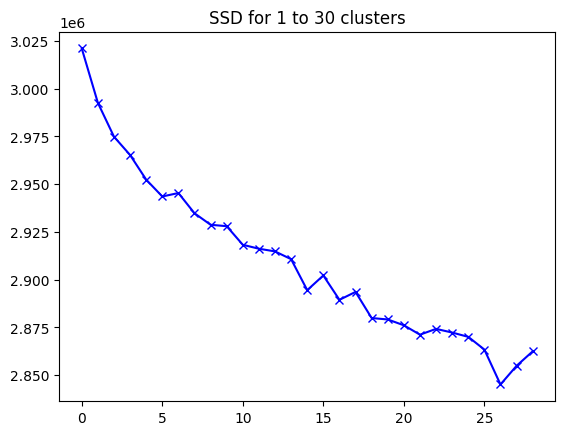

In [15]:
# visualize results
plt.plot(cost, 'bx-')
plt.title('SSD for 1 to 30 clusters')
plt.show()

In [16]:
silhouette_coefficient_list = []

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(tfid_matrix_normalized)
    score = silhouette_score(tfid_matrix_normalized, kmeans.labels_)
    silhouette_coefficient_list.append(score)

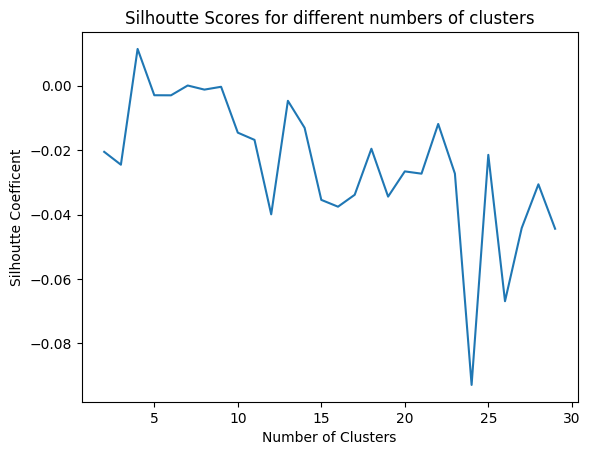

In [17]:
# Plot the silhoutte scores
plt.figure()
plt.plot(range(2, 30), silhouette_coefficient_list, label='kmeans')
plt.title('Silhoutte Scores for different numbers of clusters')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficent")
plt.show()

# Ignore this part for now (just some experimentation)

In [13]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(x_normalized)

/Users/patrickmuller/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [14]:
kmeans_labels = kmeans.labels_

clusters = pd.concat([df, pd.DataFrame({'Cluster': kmeans_labels})], axis=1)
clusters.head()

,Content_in_en,Cluster
0,ariv favorit brandsget appour visionpartnershi...,5.0
1,revers life insur get twice much life pension ...,3.0
2,strong insur lifestyl helden de home product f...,0.0
3,restub airbag freedom safeti water restub skip...,4.0
4,curevac revolution mrna peopl live us us manag...,2.0


In [21]:
cluster_5 = clusters.loc[clusters['Cluster'] == 5]
cluster_5.head()

,Content_in_en,Cluster
0,ariv favorit brandsget appour visionpartnershi...,5.0
9,site undergo mainten doctorsg thank patienc do...,5.0
10,domain detail page sorri app doesnt work prope...,5.0
17,home frauwertvol,5.0
21,dayoffwer sorri dayoff doesnt work proper with...,5.0


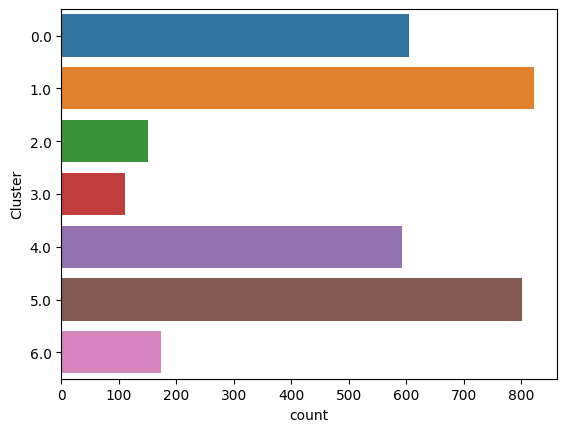

In [23]:
sns.countplot(data=clusters, y='Cluster')
plt.show()

In [28]:
sil_score = silhouette_score(x_normalized, kmeans_labels)

print("The silhouette score is:", sil_score)

The silhouette score is: -0.001920416027731034


In [ ]:
#for c in clusters:
#    grid= sns.FacetGrid(clusters, col='Cluster')
#    grid.map(plt.hist, c)

In [15]:
# Apply TruncatedSVD
svd = TruncatedSVD(2).fit_transform(x_normalized)
svd.shape

(3258, 2)

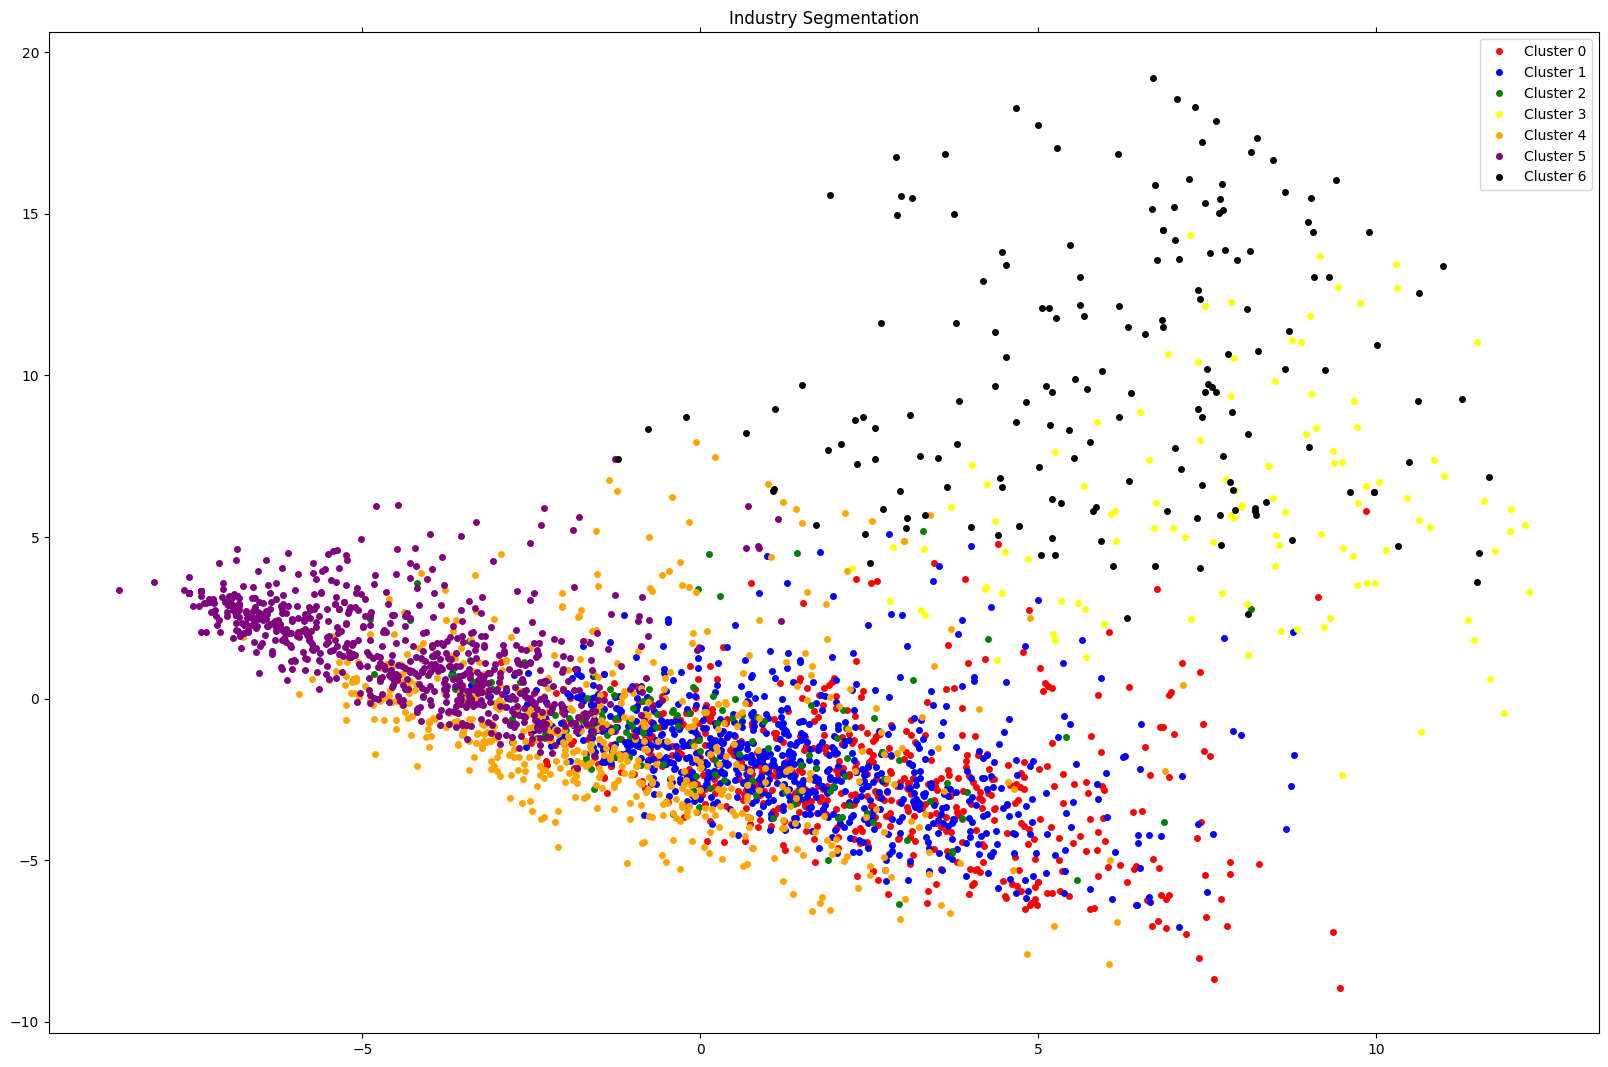

In [17]:
x, y = svd[:, 0], svd[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple',
          6: 'black',
          #7: 'brown',
          #8: 'azure',
          #9: 'ivory',
          #10: 'teal',
          #11: 'silver', 
          #12: 'beige', 
          #13: 'aqua',  
          #14: 'gray',
          #15: 'maroon',
          #16: 'darkgray',
          #17: 'aquamarine',
          #18: 'coral',
          #19: 'fuchsia',
          #20: 'wheat',
          #21: 'lime', 
          #22: 'crimson', 
          #23: 'magenta',  
          #24: 'cyan'
        }

names = {0: 'Cluster 0', 
         1: 'Cluster 1', 
         2: 'Cluster 2', 
         3: 'Cluster 3', 
         4: 'Cluster 4',
         5: 'Cluster 5',
         6: 'Cluster 6', 
         #7: 'Cluster 7', 
         #8: 'Cluster 8', 
         #9: 'Cluster 9', 
         #10: 'Cluster 10',
         #11: 'Cluster 11',
         #12: 'Cluster 12', 
         #13: 'Cluster 13', 
         #14: 'Cluster 14', 
         #15: 'Cluster 15', 
         #16: 'Cluster 16',
         #17: 'Cluster 17',
         #18: 'Cluster 18', 
         #19: 'Cluster 19', 
         #20: 'Cluster 20', 
         #21: 'Cluster 21', 
         #22: 'Cluster 22',
         #23: 'Cluster 23',
         #24: 'Cluster 24'
        }
  
df = pd.DataFrame({'x': x, 'y': y, 'label': kmeans_labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name], label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis= 'y', which='both', left='off', top='off', labelleft='off')
    
ax.legend()
ax.set_title("Industry Segmentation")
plt.show()